In [1]:
import torch
print(torch.__version__)

2.4.1


# 数学基础
## 线性代数
> 这里只讨论深度学习中需要使用的线性代数的部分, 也就是矩阵运算的部分, 其他部分(比如矩阵的秩)这些部分在深度学习中基本不会涉及, 所以就不说了
### 矩阵运算
> 这里的矩阵运算主要是指矩阵的求导运算

#### 1. 矩阵对标量求导
如果矩阵 $Y$ 是一个 $m \times n$ 的矩阵, 对于标量 $x$ 求导, 相当于对于矩阵中的每一个元素求导
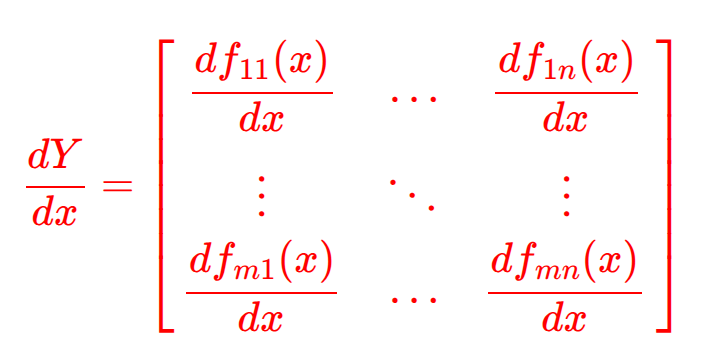
#### 2. 标量函数对于矩阵求导
对于标量函数 $y = f(x)$, 如果矩阵 $X$ 是一个 $m \times n$ 的矩阵, 则:
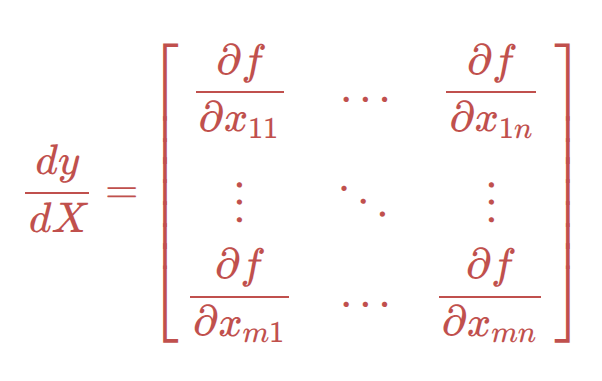
#### 3. 函数矩阵对于矩阵求导
此时可以把函数矩阵整体当成一个函数, 带入函数对矩阵求导公式即可:
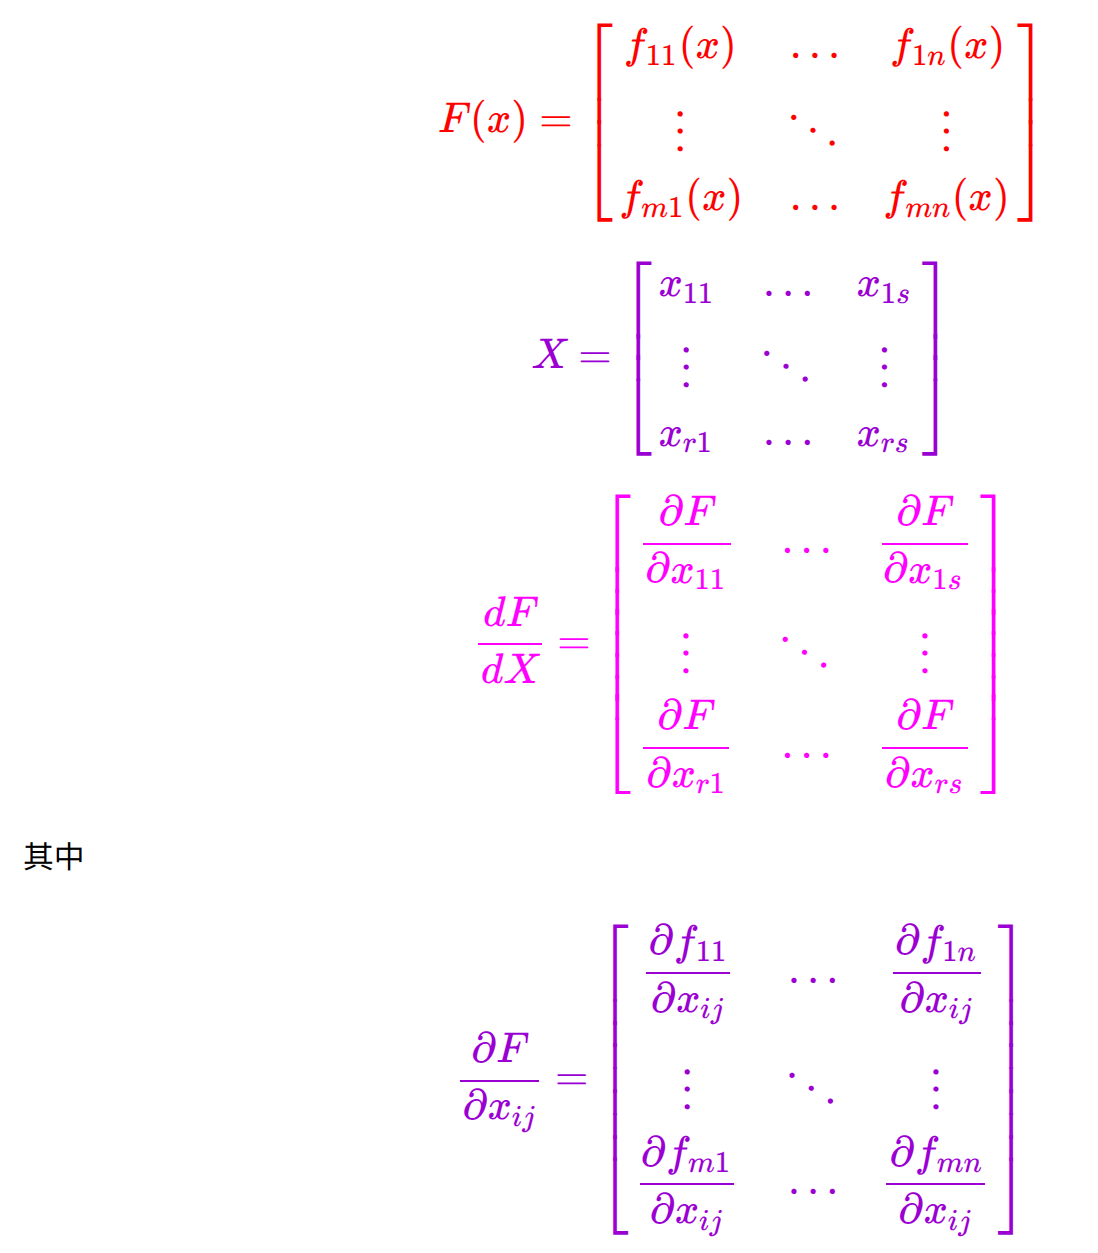
#### 4. 向量导数
其中 $m \times 1$ 的向量函数 $y = {[y_1, y_2, ..., y_m]}^T$, $x$ 是 $n \times 1$ 向量, 则有:
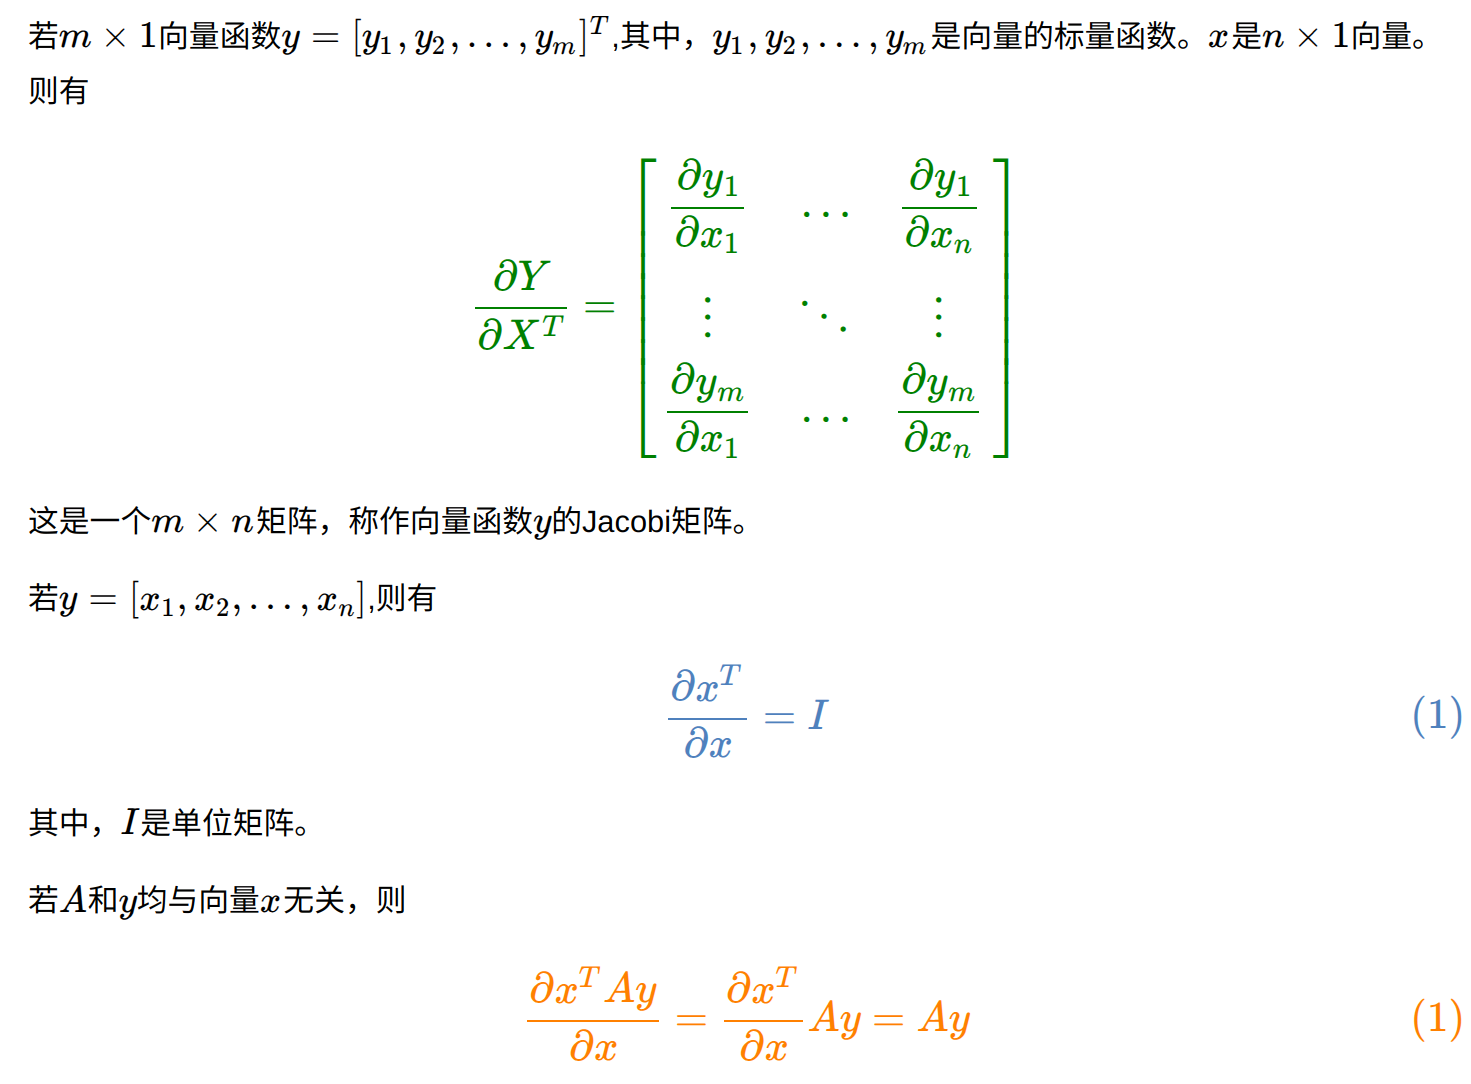

In [15]:
# 1. 矩阵求导数实现
# 1.1 矩阵 Y 对于 标量 x 求导
x = torch.tensor([2.0],  requires_grad=True)
# 放置破坏计算图, 这里需要保留 x , y 必须由 x 的运算得到
y = torch.stack([
    torch.stack([x, x**2]),
    torch.stack([x**3, x**4])
])
loss = y.sum()
loss.backward()
x.grad

tensor([49.])

In [19]:
# 1.2 标量函数 y=f(x) 对矩阵 X 求导
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)  
y = x[0,0]**2 + x[1,1]**3
y.backward()
x.grad

tensor([[ 2.,  0.],
        [ 0., 48.]])

In [28]:
# 1.3 矩阵对矩阵求导
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
y = torch.stack([
    torch.stack([x[0,0]**2, x[0,1]**2]),
    torch.stack([x[1, 0]**2, x[1,1]**2]),
])
# 无法直接对于矩阵求解导数
loss = y.mean()
# 注意在 Pytorch 中, 只可以对于标量进行反向传播操作
loss.backward()
x.grad 

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

## 微积分
### 梯度
注意区分导数和梯度的关系:
- 导数: 表示变化率, 也就是表示函数在每一个方向上的变化率
- 梯度: 表示方向, 表示函数变化最快的方向
梯度的计算方法以及性质如下:
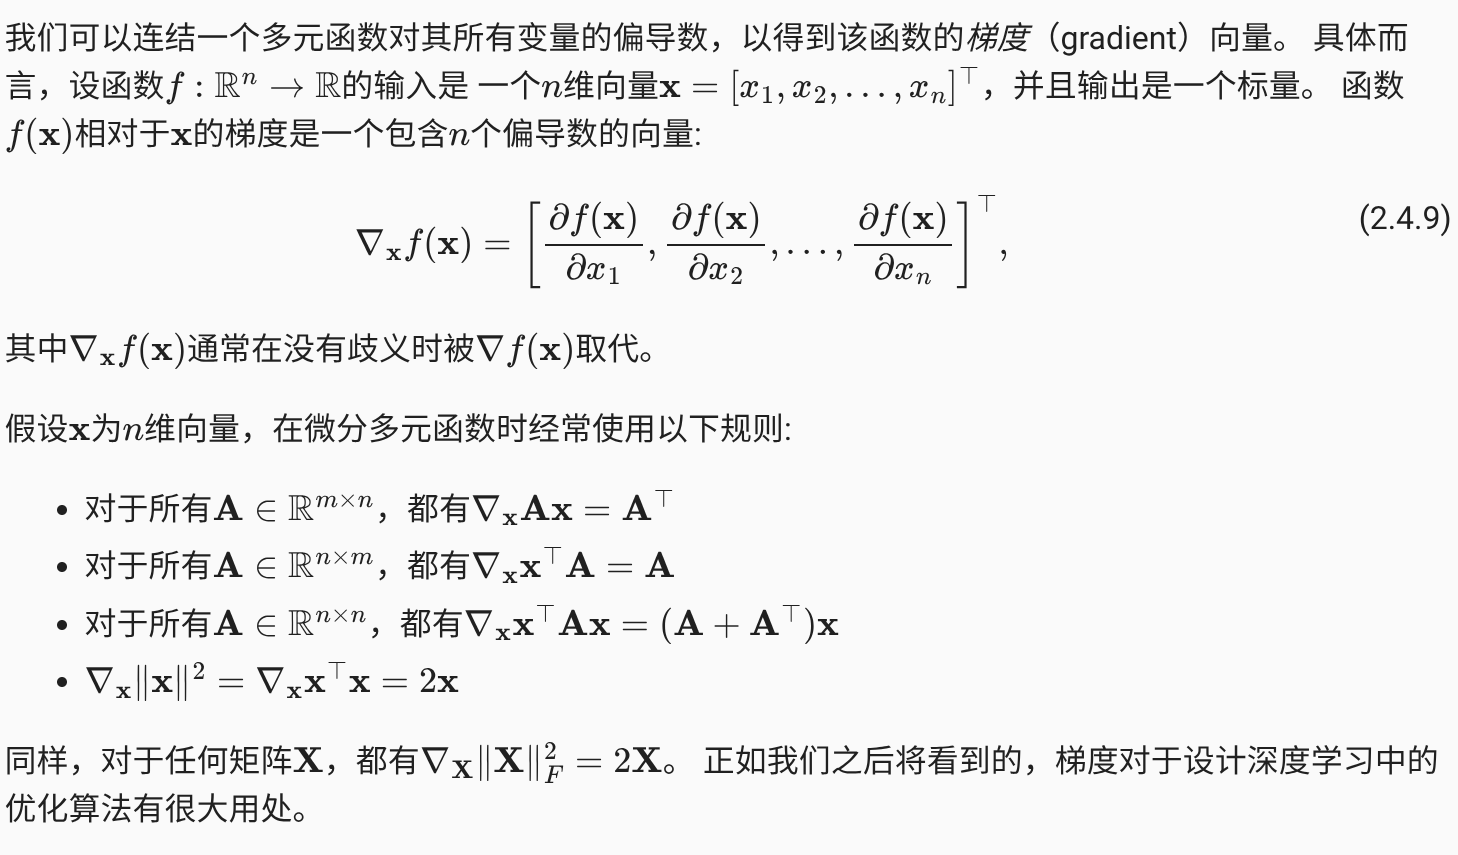

## 自动微分
每一个 `tensor` 都有一个 `requires_grad` 属性, 表示这一个向量是否需要梯度, 之后涉及到这一个变量的运算都会动态生成计算图, 并且对于计算图中的一个标量使用 `backward` 函数就可以计算计算图中各种变量的梯度 ; `detach` 函数可以用于把当前变量分离出计算图 ; `x.grad.zero_` 可以用于清除梯度

In [29]:
# 1. 自动微分
x  = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [30]:
x.requires_grad_(True) # 注意后面加上 _ 表示一个 setter 函数
x.grad

In [34]:
y = 2*torch.dot(x, x) # 表示点乘
y

tensor(28., grad_fn=<MulBackward0>)

In [35]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [36]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [39]:
# 2. 分离计算
x = torch.tensor([2.0], requires_grad=True)
y = x*x
u = y.detach() # 表示把 u 从计算图中分离, 此时梯度不会经过 u 流向 x, u 就是一个常数
z = u*x
z.backward()
x.grad == u

tensor([True])

## 概率论
> 这一个部分比较熟悉, 先不说了